In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#loading librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
df= pd.read_csv("../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")

In [4]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

In [22]:
#There are 550 number of records in the dataset
df.shape
len(df)

550

In [66]:
#there are 351 number of unique books
len(df.Name.value_counts())

351

In [16]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
#DUPLICATE RECORDS
x=df.groupby("Name")
y= x["User Rating"].mean().sort_values(ascending= False).head(10)
df.Name.value_counts()


Publication Manual of the American Psychological Association, 6th Edition       10
StrengthsFinder 2.0                                                              9
Oh, the Places You'll Go!                                                        8
The 7 Habits of Highly Effective People: Powerful Lessons in Personal Change     7
The Very Hungry Caterpillar                                                      7
                                                                                ..
Diary of a Wimpy Kid: Hard Luck, Book 8                                          1
Lean In: Women, Work, and the Will to Lead                                       1
The Tipping Point: How Little Things Can Make a Big Difference                   1
What If?: Serious Scientific Answers to Absurd Hypothetical Questions            1
The House of Hades (Heroes of Olympus, Book 4)                                   1
Name: Name, Length: 351, dtype: int64

In [7]:
#renaming user rating column
df.rename(columns={"User Rating":"User_rating"},inplace=True)

In [8]:
#there 28 books with highest user rating of 4.9
df.groupby("Name").User_rating.mean().sort_values(ascending= False).head(29)

Name
Hamilton: The Revolution                                                                                                   4.9
Rush Revere and the First Patriots: Time-Travel Adventures With Exceptional Americans (2)                                  4.9
Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)                                      4.9
Harry Potter and the Prisoner of Azkaban: The Illustrated Edition (Harry Potter, Book 3)                                   4.9
Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)                                    4.9
Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)                                    4.9
Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6)                                            4.9
Brown Bear, Brown Bear, What Do You See?                                                                  

<AxesSubplot:ylabel='Name'>

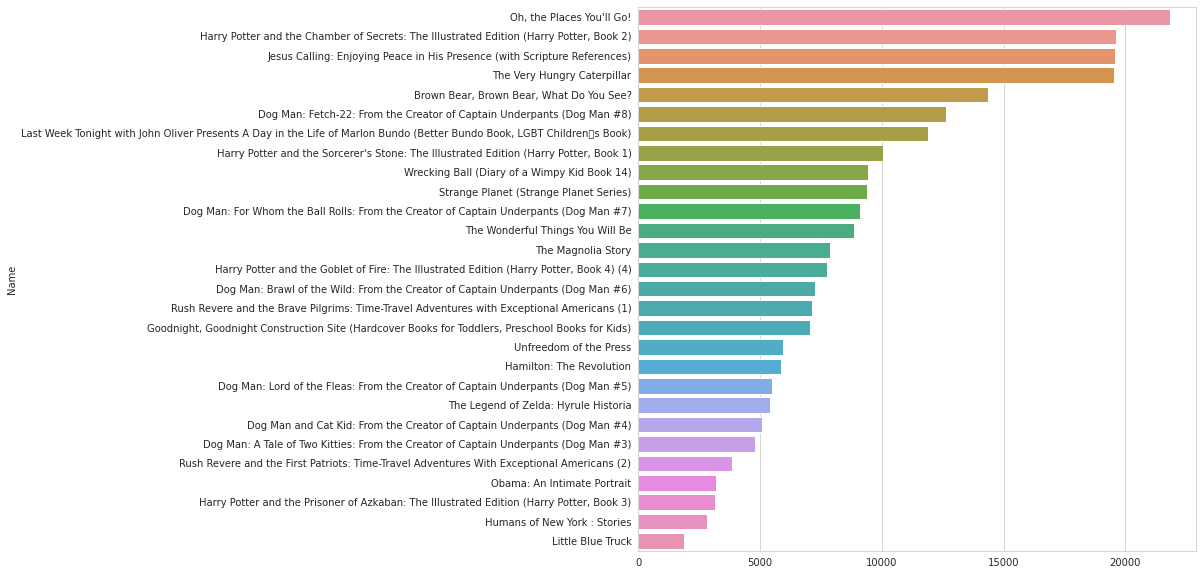

In [57]:
#Top rated books (rating=4.9) ploted based on their reviews
#Oh,the places you'll Go! is the top rated book with most reviews
x=df[df["User_rating"]==4.9]
y= x.groupby("Name").Reviews.mean().sort_values(ascending= False)
plt.figure(figsize= (10,10))
sns.barplot(y.values,y.index)

<AxesSubplot:ylabel='Name'>

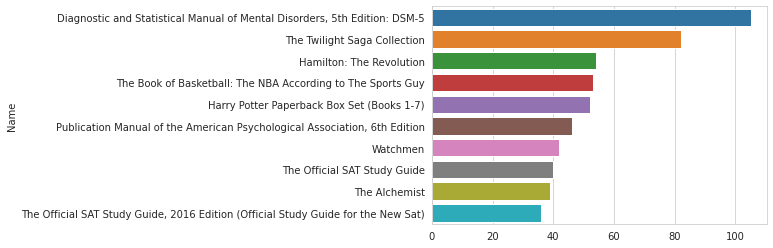

In [11]:
#most expensive books
x= df.groupby("Name").Price.mean().sort_values(ascending= False).head(10)
sns.barplot(x.values,x.index)


<AxesSubplot:ylabel='Name'>

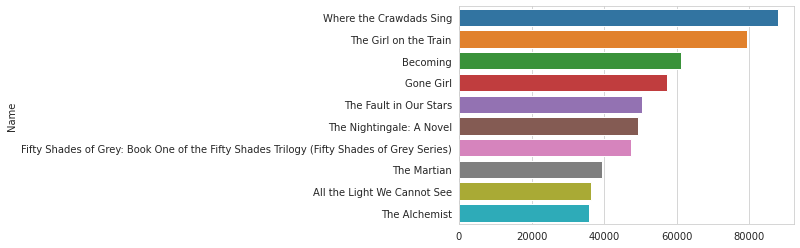

In [12]:
#Most reviewed books
x= df.groupby("Name").Reviews.mean().sort_values(ascending= False).head(10)
sns.barplot(x.values,x.index)

<AxesSubplot:xlabel='Price', ylabel='User_rating'>

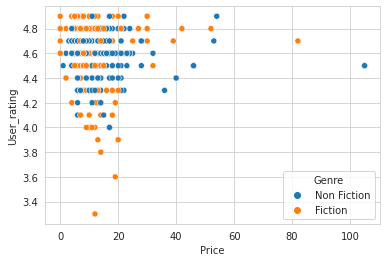

In [14]:
#user ratings and price relation
sns.scatterplot(x="Price",y= "User_rating",data= df,hue= "Genre")

<AxesSubplot:xlabel='User_rating', ylabel='Reviews'>

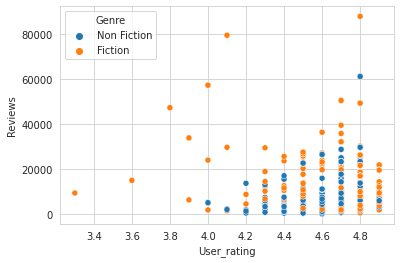

In [16]:
#user ratings and reviews relation
sns.scatterplot(x="User_rating",y= "Reviews",data= df,hue= "Genre")

<AxesSubplot:xlabel='Genre', ylabel='User_rating'>

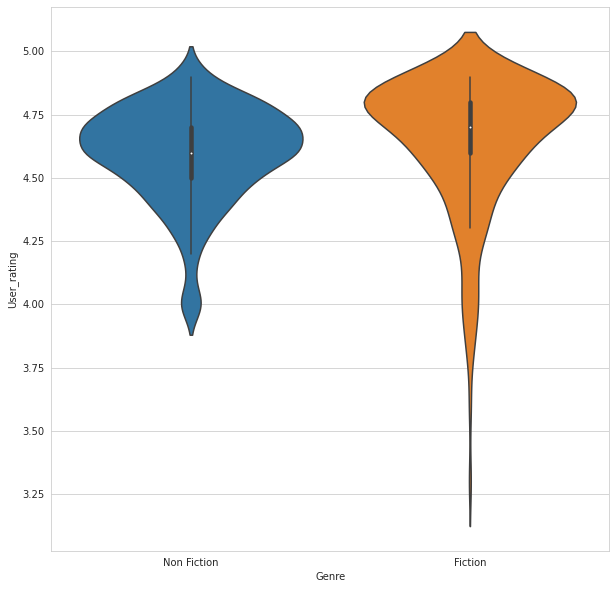

In [97]:
#violin plot ratings based on genres
plt.figure(figsize= (10,10))
sns.violinplot(x= "Genre",y= "User_rating",data= df)

<AxesSubplot:xlabel='Genre', ylabel='Reviews'>

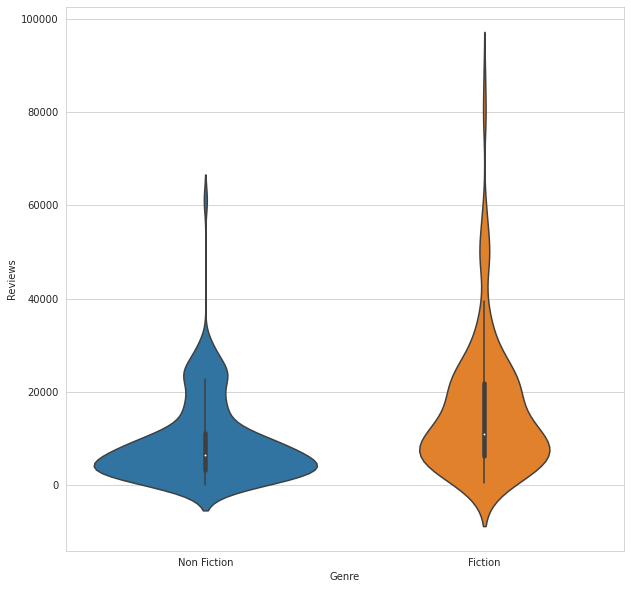

In [98]:
#violin plot reviews based on genres

plt.figure(figsize= (10,10))
sns.violinplot(x= "Genre",y= "Reviews",data= df)

<AxesSubplot:ylabel='Name'>

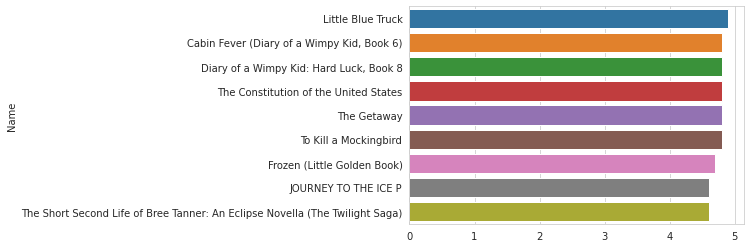

In [27]:
#Top rated free books
x= df[df["Price"]==0]
y= x.groupby("Name").User_rating.mean().sort_values(ascending = False).head(20)
sns.barplot(y.values,y.index)

<AxesSubplot:xlabel='Genre', ylabel='count'>

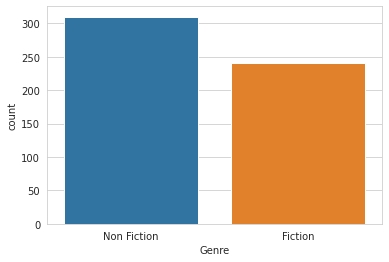

In [28]:
sns.countplot(x= "Genre",data= df)

Text(0.5, 0, 'Ratings')

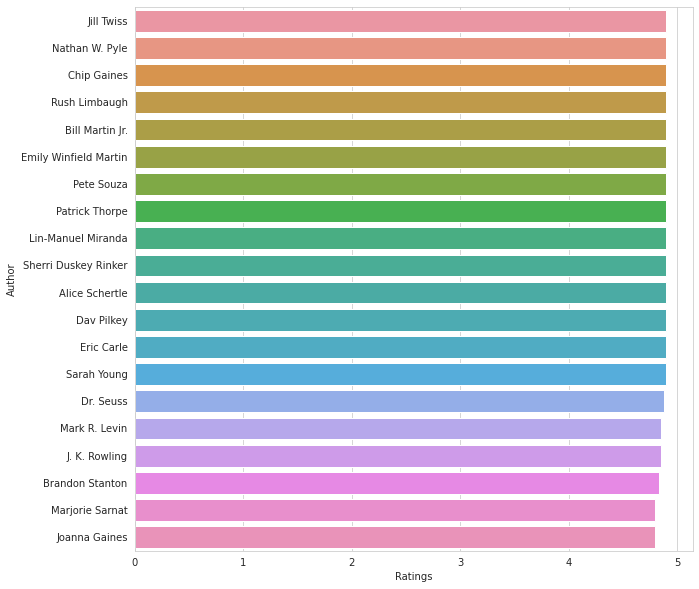

In [63]:
#top rated authors
x= df.groupby("Author").User_rating.mean().sort_values(ascending= False).head(20)
plt.figure(figsize= (10,10))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Ratings")


<AxesSubplot:xlabel='Year', ylabel='Reviews'>

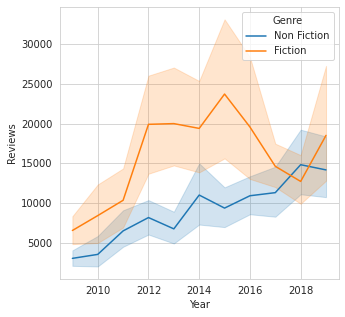

In [74]:
#reviews over the years
plt.figure(figsize= (5,5))
sns.lineplot(x= "Year",y= "Reviews",data= df,hue="Genre")

<AxesSubplot:xlabel='Year', ylabel='Price'>

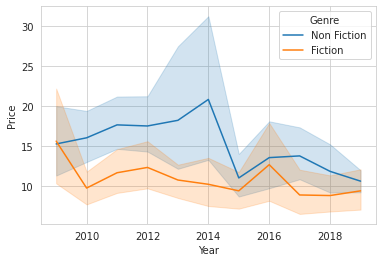

In [73]:
#prices over the years
sns.lineplot(x= "Year",y= "Price",data= df,hue="Genre")

<AxesSubplot:xlabel='User_rating', ylabel='Count'>

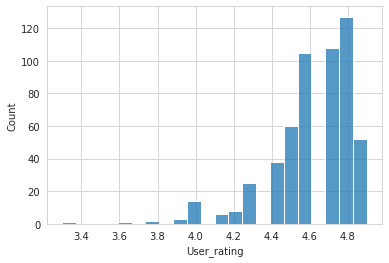

In [86]:
#user rating distribution
sns.histplot(df,x= "User_rating")

<AxesSubplot:xlabel='Reviews', ylabel='Density'>

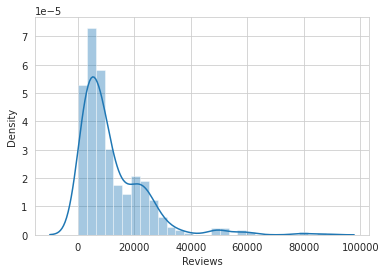

In [88]:
#reviews distribution
sns.distplot(df.Reviews)

<AxesSubplot:xlabel='Price', ylabel='Density'>

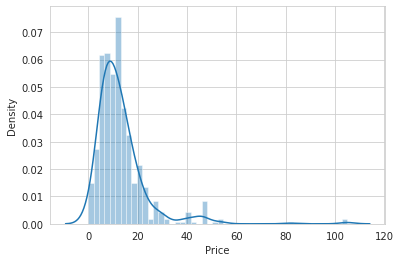

In [89]:
#price distribution
sns.distplot(df.Price)

In [98]:
#Top rated books in non fiction genre
x= df[df["Genre"]=="Non Fiction"]
x.groupby("Name").User_rating.mean().sort_values(ascending= False).head(10)

Name
Humans of New York : Stories                                                                           4.9
Unfreedom of the Press                                                                                 4.9
Hamilton: The Revolution                                                                               4.9
The Magnolia Story                                                                                     4.9
Obama: An Intimate Portrait                                                                            4.9
Jesus Calling: Enjoying Peace in His Presence (with Scripture References)                              4.9
National Geographic Kids Why?: Over 1,111 Answers to Everything                                        4.8
Creative Haven Owls Coloring Book (Adult Coloring)                                                     4.8
Daring Greatly: How the Courage to Be Vulnerable Transforms the Way We Live, Love, Parent, and Lead    4.8
Humans of New York              

In [97]:
#Top rated Authors in non fiction genre

x.groupby("Author").User_rating.mean().sort_values(ascending= False).head(10)

Author
Chip Gaines                         4.900000
Pete Souza                          4.900000
Lin-Manuel Miranda                  4.900000
Sarah Young                         4.900000
Mark R. Levin                       4.850000
Brandon Stanton                     4.833333
Joanna Gaines                       4.800000
Daniel James Brown                  4.800000
David Goggins                       4.800000
Delegates of the Constitutional
    4.800000
Name: User_rating, dtype: float64

In [106]:
#Top rated books(rating= 4.9) in fiction genre based on reviews
x= df[df["Genre"]=="Fiction"]
x= x[x["User_rating"]==4.9]
x.groupby("Name").Reviews.mean().sort_values(ascending= False).head(10)

Name
Oh, the Places You'll Go!                                                                                                  21834
Harry Potter and the Chamber of Secrets: The Illustrated Edition (Harry Potter, Book 2)                                    19622
The Very Hungry Caterpillar                                                                                                19546
Brown Bear, Brown Bear, What Do You See?                                                                                   14344
Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8)                                                     12619
Last Week Tonight with John Oliver Presents A Day in the Life of Marlon Bundo (Better Bundo Book, LGBT Childrens Book)    11881
Harry Potter and the Sorcerer's Stone: The Illustrated Edition (Harry Potter, Book 1)                                      10052
Wrecking Ball (Diary of a Wimpy Kid Book 14)                                                

In [108]:
#top rated authors for fiction genre
x= df[df["Genre"]=="Fiction"]

x.groupby("Author").User_rating.mean().sort_values(ascending= False).head(20)

Author
Patrick Thorpe           4.900000
Nathan W. Pyle           4.900000
Jill Twiss               4.900000
Rush Limbaugh            4.900000
Alice Schertle           4.900000
Emily Winfield Martin    4.900000
Sherri Duskey Rinker     4.900000
Bill Martin Jr.          4.900000
Dav Pilkey               4.900000
Eric Carle               4.900000
Dr. Seuss                4.877778
J. K. Rowling            4.850000
Giles Andreae            4.800000
Delia Owens              4.800000
Maurice Sendak           4.800000
R. J. Palacio            4.800000
Golden Books             4.800000
Adam Mansbach            4.800000
Robert Jordan            4.800000
Drew Daywalt             4.800000
Name: User_rating, dtype: float64